In [1]:
import scanpy as sc
import seaborn as sns
import os

In [2]:
# 设置参数
sc.settings.verbosity = 4
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=300,
    facecolor="white",
    frameon=False,  # remove frame
)

# 预分析
- 1.加载数据
- 2.基本信息
- 3.标准质控
- 4.环境RNA校正（可选）
- 5.双峰检测

 1.加载数据
- 1.1导入h5ad.gz文件
- 1.2导入h5ad文件
- 1.3导入10x数据

In [3]:
# ## 1.1导入h5ad.gz文件
# import gzip
# DIR_RAW = "../../data/raw/GSE223964_allcell.h5ad.gz"
# with gzip.open(DIR_RAW, "rb") as f:
#     adata = sc.read_h5ad(f)

In [4]:
# ## 1.2导入h5ad文件
# DIR_RAW = "GSE223964_allcell.h5ad"
# adata = sc.read_h5ad(DIR_RAW)

In [5]:
## 1.3导入10x数据
# adata = sc.read_10x_mtx("./", var_names="gene_symbols", cache=False)

In [6]:
## 1.4批量读入

# 指定包含H5文件的文件夹路径
file_path = '../../data/raw/h5'
file_names = os.listdir(file_path)

adatas = []
for file_name in file_names:
  adata = sc.read_10x_h5(os.path.join(file_path, file_name))
  adata.var["gene_names"] = adata.var.index # 保留重复的
  adata.obs["Barcode"] = adata.obs.index
  adata.var_names_make_unique() # 加序号
#   adata.obs_names_make_unique() # 加序号
#   adata.obs_names = [f"{file_name}_{obs_name}" for obs_name in adata.obs_names] # 加上文件名
  adatas.append(adata)

adata_merge = ad.concat(
  adatas,
  keys=file_names,
  label='batch',
  index_unique='_', #"{orig_index}{index_unique}{key}"，
  merge="first"

)

adata_merge.obs["sample"] = adata_merge.obs["batch"].str.split("_").str[1]
# 查看是否有重复的index
has_duplicates = adata_merge.obs.index.duplicated().any()
print("Has duplicates:", has_duplicates)
adata = adata_merge.copy()
del adata_merge

reading ../../data/raw/h5/GSM7008851_diab19.h5
 (0:00:00)
reading ../../data/raw/h5/GSM7008852_diab19b.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008853_diab19c.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008849_diab13.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008848_diab10.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008847_diab9.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008850_diab16.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008846_diab7.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/merge.py:1015: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_ac

Has duplicates: False


In [7]:
## 2.1 确保变量名唯一
adata.var_names_make_unique()  # add numbers to gene names
# # 删除原作者的信息
# del adata.obsm, adata.obsp, adata.varm, adata.layers, adata.uns
# drop_cols = [
#     "n_genes",
#     "n_genes_by_counts",
#     "total_counts",
#     "total_counts_mt",
#     "pct_counts_mt",
#     "leiden",
#     "Cell Type",
# ]
# drop_vars = [
#     "n_cells",
#     "mt",
#     "n_cells_by_counts",
#     "mean_counts",
#     "pct_dropout_by_counts",
#     "total_counts",
#     "highly_variable",
#     "means",
#     "dispersions",
#     "dispersions_norm",
# ]
# adata.obs = adata.obs.drop(columns=drop_cols)
# adata.var = adata.var.drop(columns=drop_vars)
# 保存
adata.write("anndata_raw.h5ad", compression="gzip") # type: ignore

In [8]:
## 2.1.2 读取
adata = sc.read("anndata_raw.h5ad")

normalizing counts per cell
    finished (0:00:00)


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

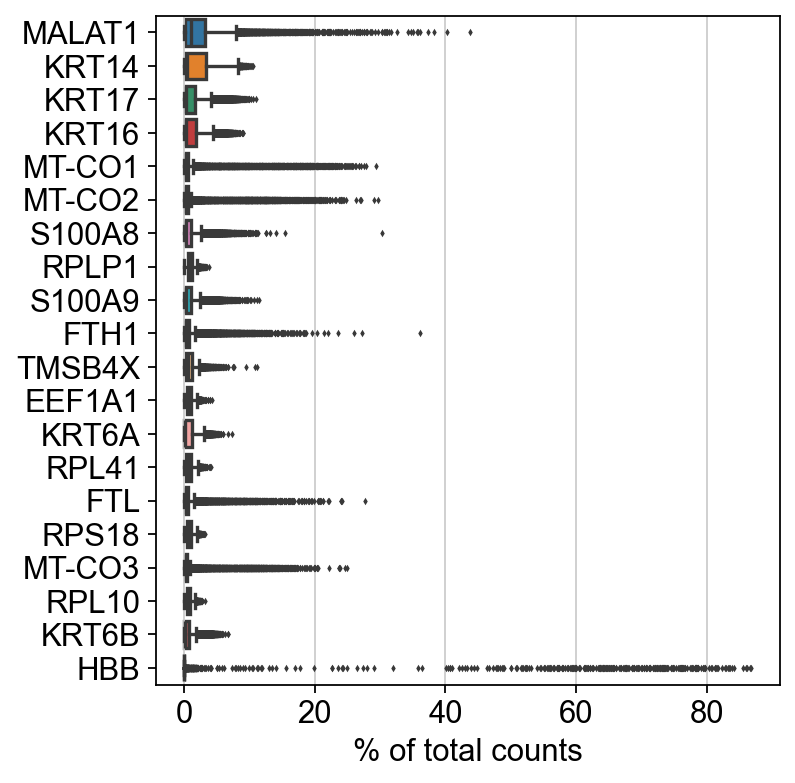

In [13]:
## 2.2 看基因在所有细胞中的表达情况
"""
    - 预期出现的基因类型,如 mitochondrial genes、actin、ribosomal protein 和 MALAT1。
    - 如果所有的外部控制转录本(spike-in transcripts)都在前50名中,可能意味着添加了过多的外部控制RNA。
    - 大量的伪基因或预测的基因可能暗示着在基因比对过程中可能存在问题。
"""
sc.pl.highest_expr_genes(adata, n_top=20)

 3.标准质控
- 3.1 读取经过环境RNA校正、基础过滤、双联体过滤后的数据
- 3.2 识别线粒体基因、核糖体基因、血红蛋白基因
- 3.3 计算QC指标
- 3.4 绘制QC指标
- 3.5 定义离群值函数
- 3.6 检查一般参数的离群值mad=5
- 3.7 检查线粒体基因的离群值mad=3
- 3.8 过滤
- 3.9 QC可视化
- 3.10 可选：手动质控
- 3.11 保存

In [15]:
## 3.2 识别线粒体基因、核糖体基因、血红蛋白基因
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [16]:
## 3.3 计算QC指标
"""The three QC covariates:
    - total_counts: 库大小，过大的库可能是两个细胞的混合物
    - pct_counts_mt: 线粒体计数百分比
    - n_gene_by_counts: 细胞中至少有 1 个计数的基因数量
    -------------------------------
    如果一个细胞正在死亡,那么其mRNA被释放到内环境,导致线粒体基因的比例较高。
    但是,线粒体计数相对较高的细胞可能参与呼吸过程,不应被过滤掉。
    计数低或高的细胞可能对应于静止细胞群或尺寸较大的细胞。
    故我们在过滤低质量细胞的时候要同时考虑不同的QC协变量之间的关系。
    -------------------------------
    TODO:calculate_qc_metrics() inplace=True,注意第一个质控绘图的变化,可能数据已经被标准化了
"""
sc.pp.calculate_qc_metrics(
    # pp is preprocessing
    adata,
    qc_vars=["mt", "ribo", "hb"],
    inplace=True,  # False，则返回计算的指标作为 Pandas DataFrame。True，则将指标直接存储在输入的 AnnData 对象中，并不返回任何值。
    percent_top=(50, 100, 200, 500),  # 默认值
    log1p=True,
)
adata

AnnData object with n_obs × n_vars = 30852 × 22164
    obs: 'Barcode', 'batch', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_names', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a fu

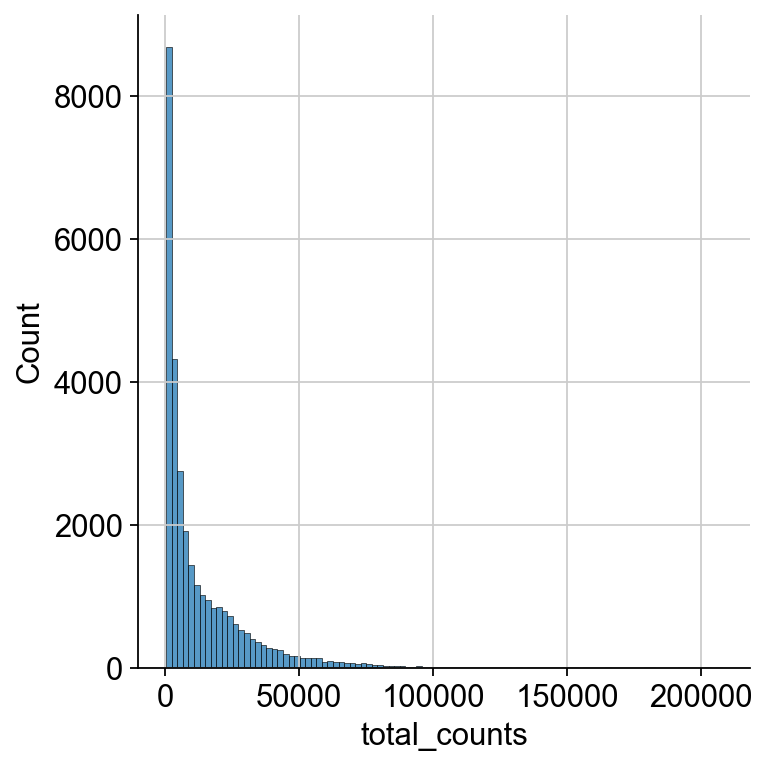

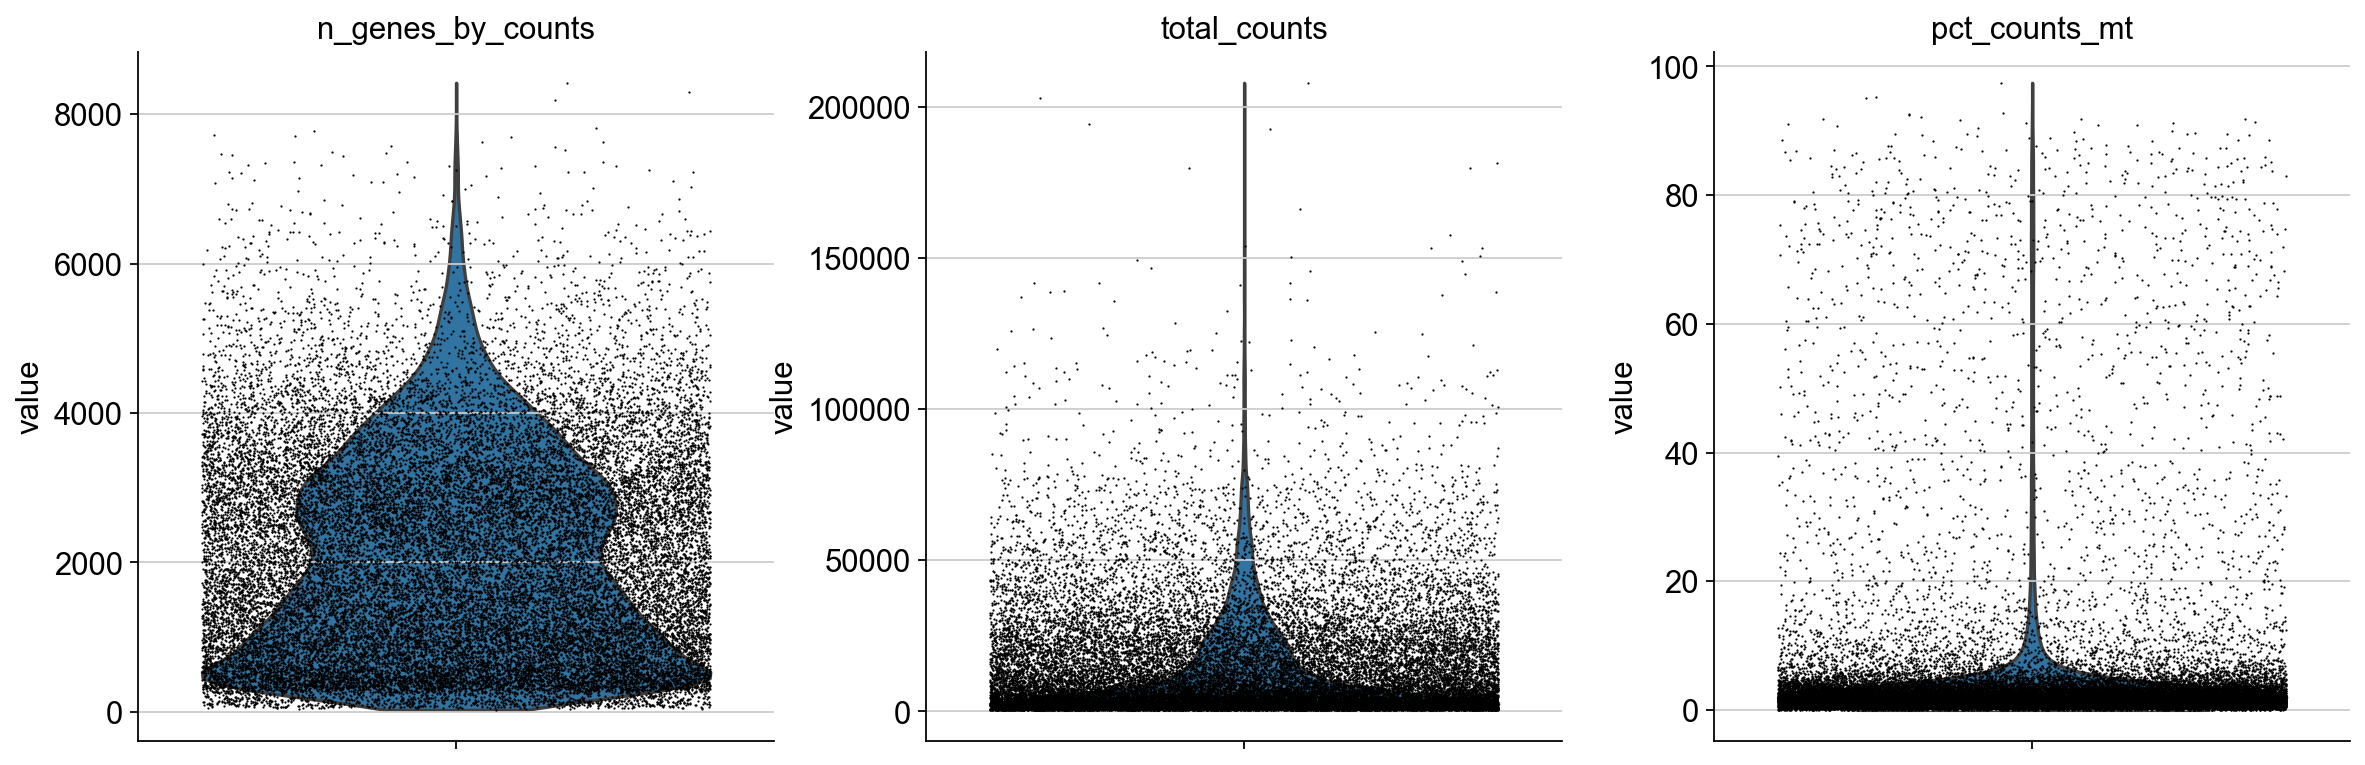

/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:315: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(adata.obs[key]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_utils.py:714: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


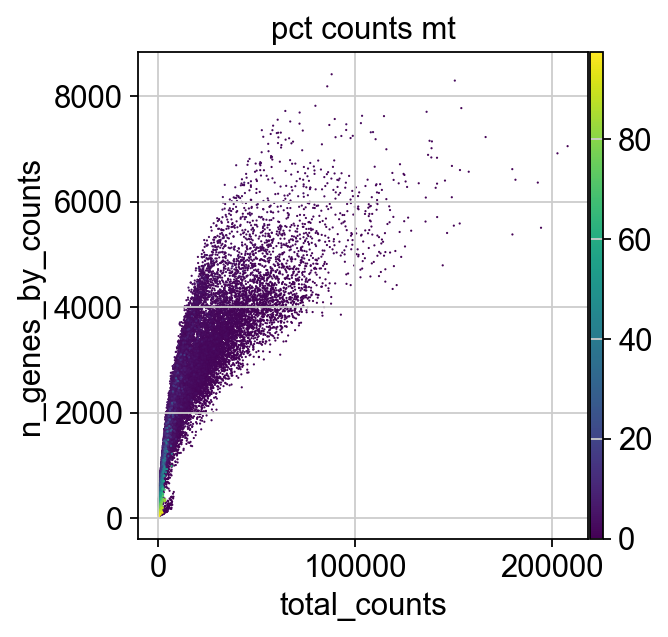

/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:315: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(adata.obs[key]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_utils.py:714: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


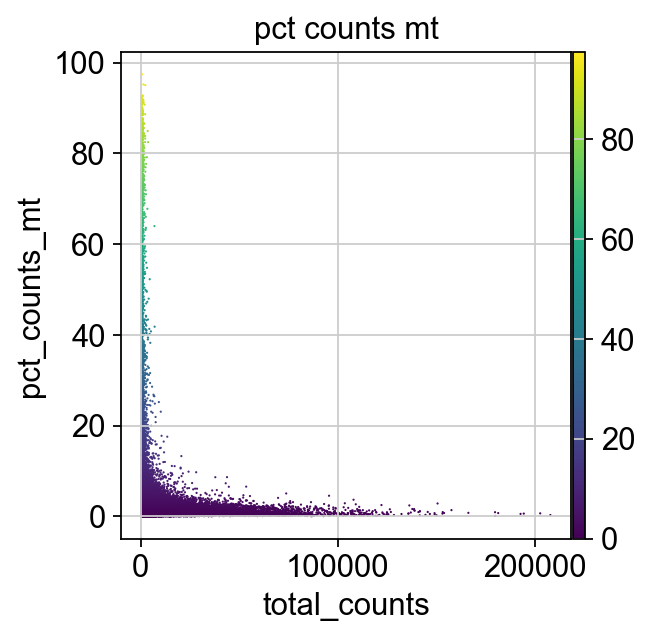

In [17]:
## 3.4 绘制QC指标
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
p2 = sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
# 画的有些多余
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")
p4 = sc.pl.scatter(adata, "total_counts", "pct_counts_mt", color="pct_counts_mt")

In [18]:
## 3.5 定义离群值函数
import numpy as np
from scipy.stats import median_abs_deviation
def is_outlier(adata, metric: str, nmads: int):
    """
    Determines if a data point is an outlier

    Parameters:
        adata (AnnData): The annotated data object.
        metric (str): The name of the metric used to determine outliers.
        nmads (int): The number of median absolute deviations used to define outliers.

    Returns:
        outlier (bool): A boolean array indicating whether each data point is an outlier.
    """

    m_metric = adata.obs[metric]
    outlier = (
        m_metric < np.median(m_metric) - nmads * median_abs_deviation(m_metric)
    ) | (np.median(m_metric) + nmads * median_abs_deviation(m_metric) < m_metric)
    return outlier

In [19]:
## 3.6 检查一般参数的离群值mad=5
adata.obs["outlier"] = (
    is_outlier(adata, "log1p_total_counts", 5)
    | is_outlier(adata, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata, "pct_counts_in_top_50_genes", 5)
)
adata.obs.outlier.value_counts()

outlier
False    29975
True       877
Name: count, dtype: int64

In [20]:
## 3.7 检查线粒体基因的离群值mad=3
adata.obs["mt_outlier"] = is_outlier(adata, "pct_counts_mt", 3) | (
    adata.obs["pct_counts_mt"] > 8
)
adata.obs.mt_outlier.value_counts()

mt_outlier
False    26367
True      4485
Name: count, dtype: int64

In [21]:
## 3.8 过滤
print(f"Total number of cells: {adata.n_obs}")
# python 的~是取反
adata.obs["all_outlier"] = adata.obs.outlier | adata.obs.mt_outlier
#备份
unfiltered = adata.copy()
adata = adata[~adata.obs.all_outlier].copy()
print(f"Number of cells after filtering of low quality cells: {adata.n_obs}")

Total number of cells: 30852


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Number of cells after filtering of low quality cells: 26061


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

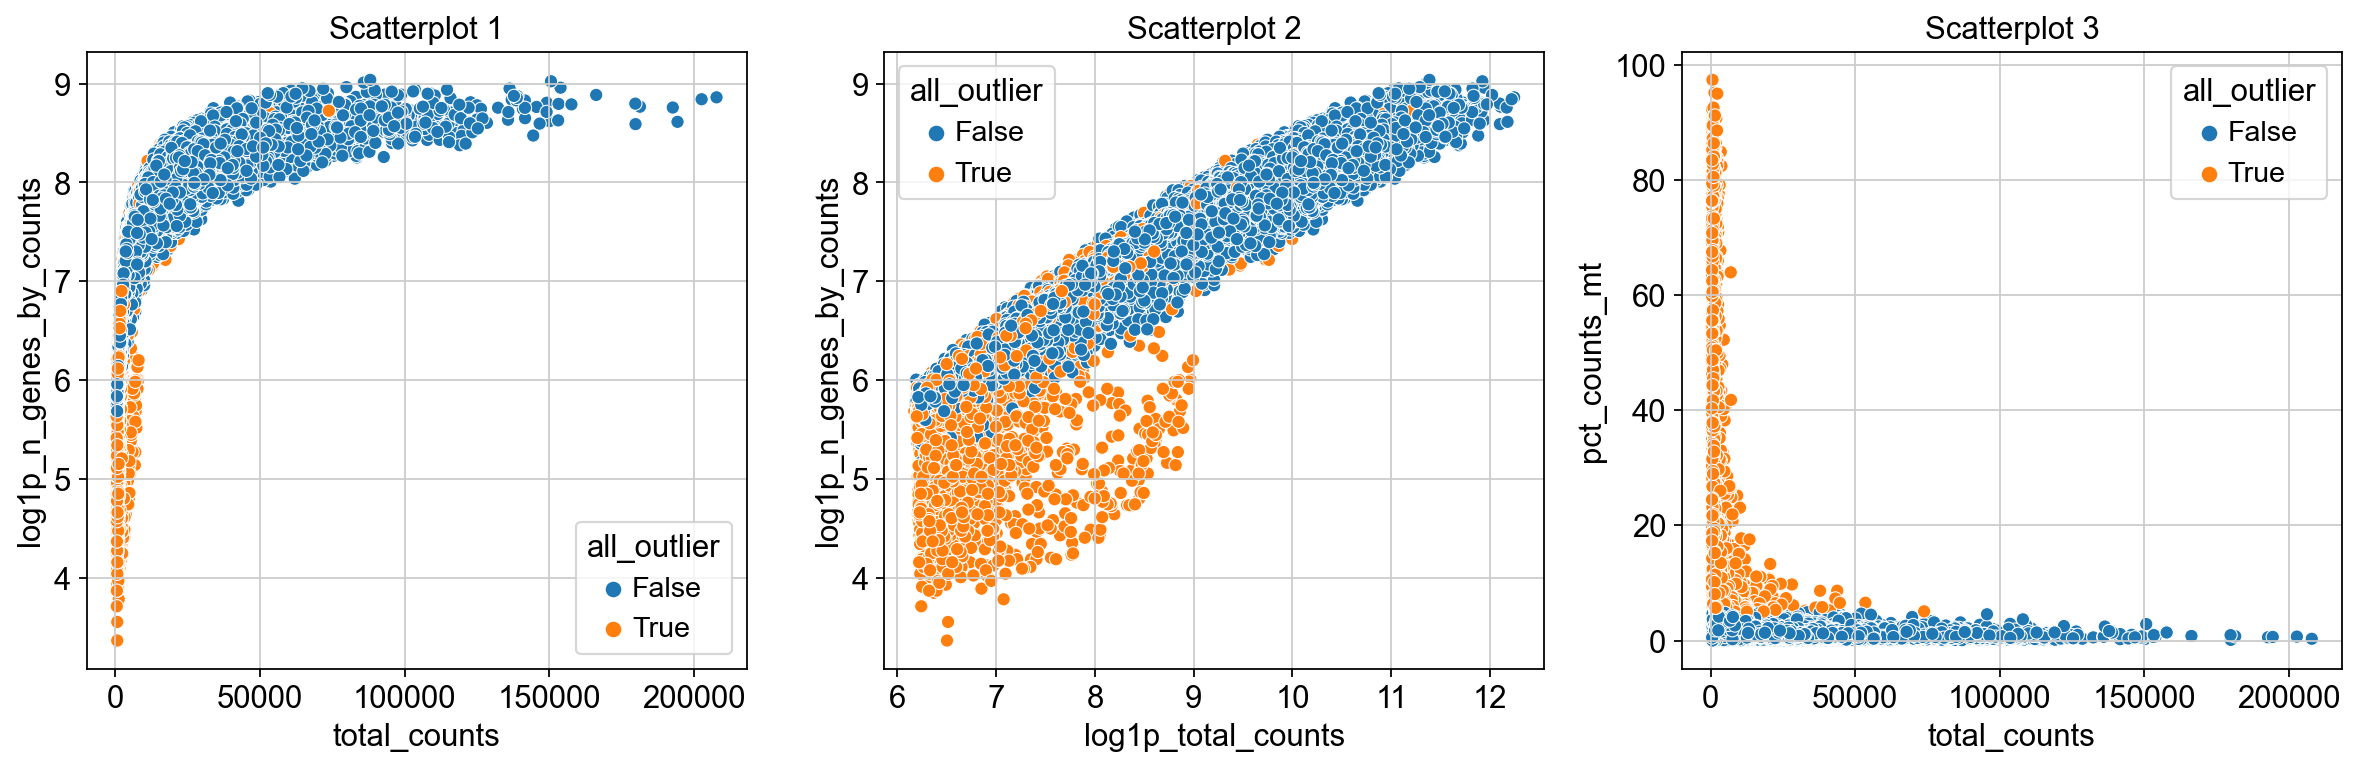

In [22]:
## 3.9 QC可视化
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x='total_counts', y='log1p_n_genes_by_counts', hue='all_outlier', data=unfiltered.obs, ax=axes[0])
axes[0].set_title('Scatterplot 1')

sns.scatterplot(x='log1p_total_counts', y='log1p_n_genes_by_counts', hue='all_outlier', data=unfiltered.obs, ax=axes[1])
axes[1].set_title('Scatterplot 2')

sns.scatterplot(x="total_counts", y="pct_counts_mt", hue="all_outlier", data=unfiltered.obs, ax=axes[2])
axes[2].set_title('Scatterplot 3')

plt.tight_layout() # 自动调整子图参数，使之填充整个图像区域
plt.show()
# TODO：应该补充删失的细胞是否是有差异的诊断图参考bioconductor
# 

In [23]:
# 3.11 保存
adata.write("anndata_qc.h5ad", compression="gzip") # type: ignore